<a href="https://colab.research.google.com/github/jeffheaton/app_generative_ai/blob/main/t81_559_class_09_3_dalle_existing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# T81-559: Applications of Generative Artificial Intelligence
**Module 9: MultiModal and Text to Image Models**
* Instructor: [Jeff Heaton](https://sites.wustl.edu/jeffheaton/), McKelvey School of Engineering, [Washington University in St. Louis](https://engineering.wustl.edu/Programs/Pages/default.aspx)
* For more information visit the [class website](https://sites.wustl.edu/jeffheaton/t81-558/).

# Module 9 Material

Module 9: MultiModal and Text to Image

* Part 9.1: Introduction to MultiModal and Text to Image [[Video]](https://www.youtube.com/watch?v=lcUsade04pg&ab_channel=JeffHeaton) [[Notebook]](t81_559_class_09_1_image_genai.ipynb)
* Part 9.2: Generating Images with DALL·E Kaggle Notebooks [[Video]](https://www.youtube.com/watch?v=CBfT1y1V1e0&ab_channel=JeffHeaton) [[Notebook]](t81_559_class_09_2_dalle.ipynb)
* **Part 9.3: DALL·E Existing Images** [[Video]](https://youtube.com/watch?v=5gdaXrJs3Kk&ab_channel=JeffHeaton) [[Notebook]](t81_559_class_09_3_dalle_existing.ipynb)
* Part 9.4: MultiModal Models [[Video]](https://www.youtube.com/watch?v=rYlj9t_wlFA&ab_channel=JeffHeaton) [[Notebook]](t81_559_class_09_4_multimodal.ipynb)
* Part 9.5: Illustrated Book [[Video]](https://www.youtube.com/watch?v=TTGen7P3ScU&ab_channel=JeffHeaton) [[Notebook]](t81_559_class_09_5_illustrated_book.ipynb)

# Google CoLab Instructions
The following code ensures that Google CoLab is running and maps Google Drive if needed.

In [1]:
import os

try:
    from google.colab import drive, userdata
    COLAB = True
    print("Note: using Google CoLab")
except:
    print("Note: not using Google CoLab")
    COLAB = False

# OpenAI Secrets
if COLAB:
    os.environ["OPENAI_API_KEY"] = userdata.get('OPENAI_API_KEY')

# Install needed libraries in CoLab
if COLAB:
    !pip install langchain openai

Note: using Google CoLab
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 413.5 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 27.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 373.5/373.5 kB 19.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.4/76.4 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 318.9/318.9 kB 19.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 396.4/396.4 kB 16.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 290.5/290.5 kB 16.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.9/141.9 kB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 2.4 MB/s eta 0:00:00
  Attempting uninstall: tenacity
    Found existing installation: tenacity 9.0.0
    Uninstalling tenacity-9.0.0:
      Successfully uninstalled tenacity-9.0.0


# Part 9.3: DALL·E Existing Images

DALLE has the ability to extend images by generating additional content based on the original image and a provided prompt. This feature, often called "outpainting," allows users to expand the boundaries of an image, adding context or completing a scene beyond the original frame. The original image serves as the foundation, while the mask image is used to define the areas where new content will be generated. The mask, typically a transparent or blocked-out region, signals to DALLE which parts of the canvas need to be filled in. By specifying a new prompt, the user guides DALLE on how to interpret the masked area, dictating the nature of the extension in alignment with the style, context, or subject matter of the original image.

In practice, outpainting leverages the original image and prompt to maintain coherence between the existing and generated content. For instance, if the original image is a landscape, the prompt can guide DALLE to extend that landscape with consistent colors, textures, and thematic elements. The system seamlessly blends the generated pixels into the original, creating an expanded scene that appears natural. The prompt plays a crucial role in steering the generation process, describing the desired extension in terms of objects, settings, or creative directions, while the mask ensures that the new content integrates smoothly into the intended area without overwriting the existing details.

Source image:
![Source Image](https://data.heatonresearch.com/images/wustl/app_genai/hickory_deck_1.png)

Mask image:
![Mask Image](https://data.heatonresearch.com/images/wustl/app_genai/hickory_deck_2.png)

The following code shows how to extend the image.

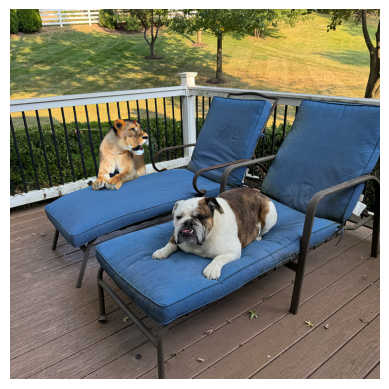

In [2]:
import requests
from PIL import Image
from io import BytesIO
import matplotlib.pyplot as plt
from openai import OpenAI

client = OpenAI()

# Function to download and load an image from a URL
def load_image_from_url(url):
    response = requests.get(url)
    img = Image.open(BytesIO(response.content))
    return img

# URLs for the images
image_url_1 = "https://data.heatonresearch.com/images/wustl/app_genai/hickory_deck_1.png"
image_url_2 = "https://data.heatonresearch.com/images/wustl/app_genai/hickory_deck_2.png"

# Load the images from URLs
image_1 = load_image_from_url(image_url_1)
image_2 = load_image_from_url(image_url_2)

# Save the images to in-memory files
img_byte_array_1 = BytesIO()
img_byte_array_2 = BytesIO()
image_1.save(img_byte_array_1, format='PNG')
image_2.save(img_byte_array_2, format='PNG')

# Reset the buffer's position to the start
img_byte_array_1.seek(0)
img_byte_array_2.seek(0)

# Use the OpenAI API to edit the images with in-memory files
response = client.images.edit(
  image=img_byte_array_1,
  mask=img_byte_array_2,
  prompt="lion",
  n=2,
  size="1024x1024"
)

# Access the first image URL from the response
edited_image_url = response.data[0].url

# Download the edited image from the URL
edited_image_response = requests.get(edited_image_url)
resulting_image = Image.open(BytesIO(edited_image_response.content))

# Display the resulting image using matplotlib
plt.imshow(resulting_image)
plt.axis('off')  # Hide the axes
plt.show()


## Creating Variations

DALLE offers the ability to create variations of images, a feature that allows users to generate alternate versions of an existing image with slight modifications while maintaining the overall theme or structure. This functionality is available via the API in DALLE 2, where developers can provide an image input and request multiple variations based on it. The API enables integration into applications that require creative content generation or visual brainstorming. However, this image variation feature is not yet supported in DALLE 3, meaning users must still rely on DALLE 2 for this specific capability.

We will see an example that creates variations of this image.

![Bulldog Cartoon](https://data.heatonresearch.com/images/wustl/app_genai/hickory_cartoon.jpg)

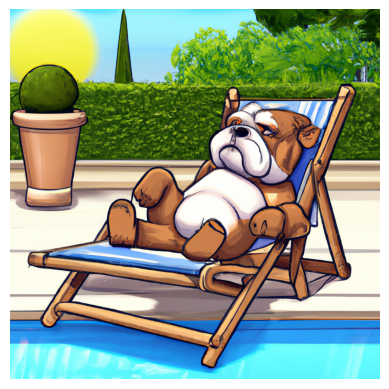

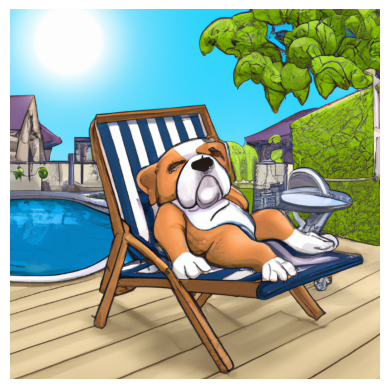

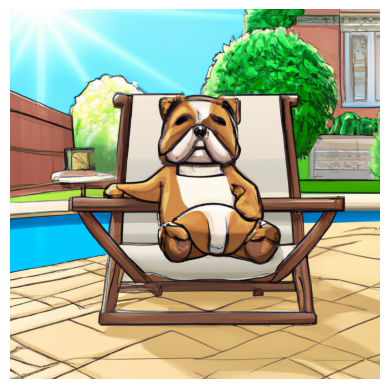

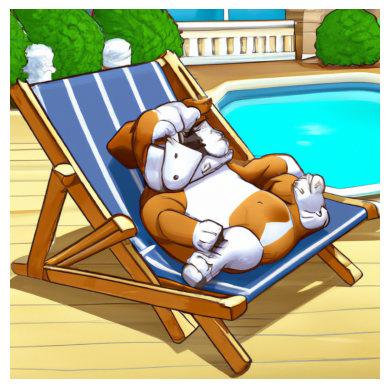

In [3]:
import requests
from PIL import Image
from io import BytesIO
import matplotlib.pyplot as plt
from openai import OpenAI

client = OpenAI()

# Function to display the image using matplotlib
def display_image(image):
    plt.imshow(image)
    plt.axis('off')  # Hide the axes for a cleaner view
    plt.show()

# Function to download the image from a URL and convert it to a file-like object
def load_image_from_url(url):
    response = requests.get(url)
    img = Image.open(BytesIO(response.content))

    # Save the image to an in-memory file
    img_byte_array = BytesIO()
    img.save(img_byte_array, format='PNG')

    # Reset the buffer's position to the start
    img_byte_array.seek(0)
    return img_byte_array

# URL of the image to use
image_url = "https://data.heatonresearch.com/images/wustl/app_genai/hickory_cartoon.jpg"

# Load the image from the URL
image_from_url = load_image_from_url(image_url)

# Create variations of the image using the OpenAI API
response = client.images.create_variation(
    image=image_from_url,
    n=4,
    size="1024x1024"
)

# Loop through the generated image variations and display/save them
for i, data in enumerate(response.data):
    # Get the image URL
    variation_image_url = data.url

    # Fetch the image from the URL
    variation_image_response = requests.get(variation_image_url)
    variation_image = Image.open(BytesIO(variation_image_response.content))

    # Display the image using matplotlib
    display_image(variation_image)

    # Optionally save the variation image to disk
    variation_image.save(f"variation_image_{i+1}.png", "PNG")


In [4]:
from google.colab import files

# Download the image saved as variation_image_1.png
files.download('variation_image_1.png')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>